In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

In [3]:
root_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(root_dir)

In [4]:
from src.activation_dataset import ActivationDataset

In [5]:
from src.correlation.correlation_analyzer import CorrelationAnalyzer

In [68]:
from src.correlation.correlation_plots import plot_feature_correlation_heatmap

In [7]:
dataset = ActivationDataset()

In [8]:
CHECKPOINT_DIR = root_dir + '/ckpts/2025-02-13_09-26-08'
dataset.load(os.path.join(CHECKPOINT_DIR, 'strong_activation_dataset.pkl'))

In [9]:
correlation_analyzer = CorrelationAnalyzer(dataset)

In [10]:
print(dataset.metadata.keys())

dict_keys(['features', 'phase_masks'])


Note: skip this section as the raw plots are hard to see, will have a statistics summary section later that is more informative

Computing correlations for features...


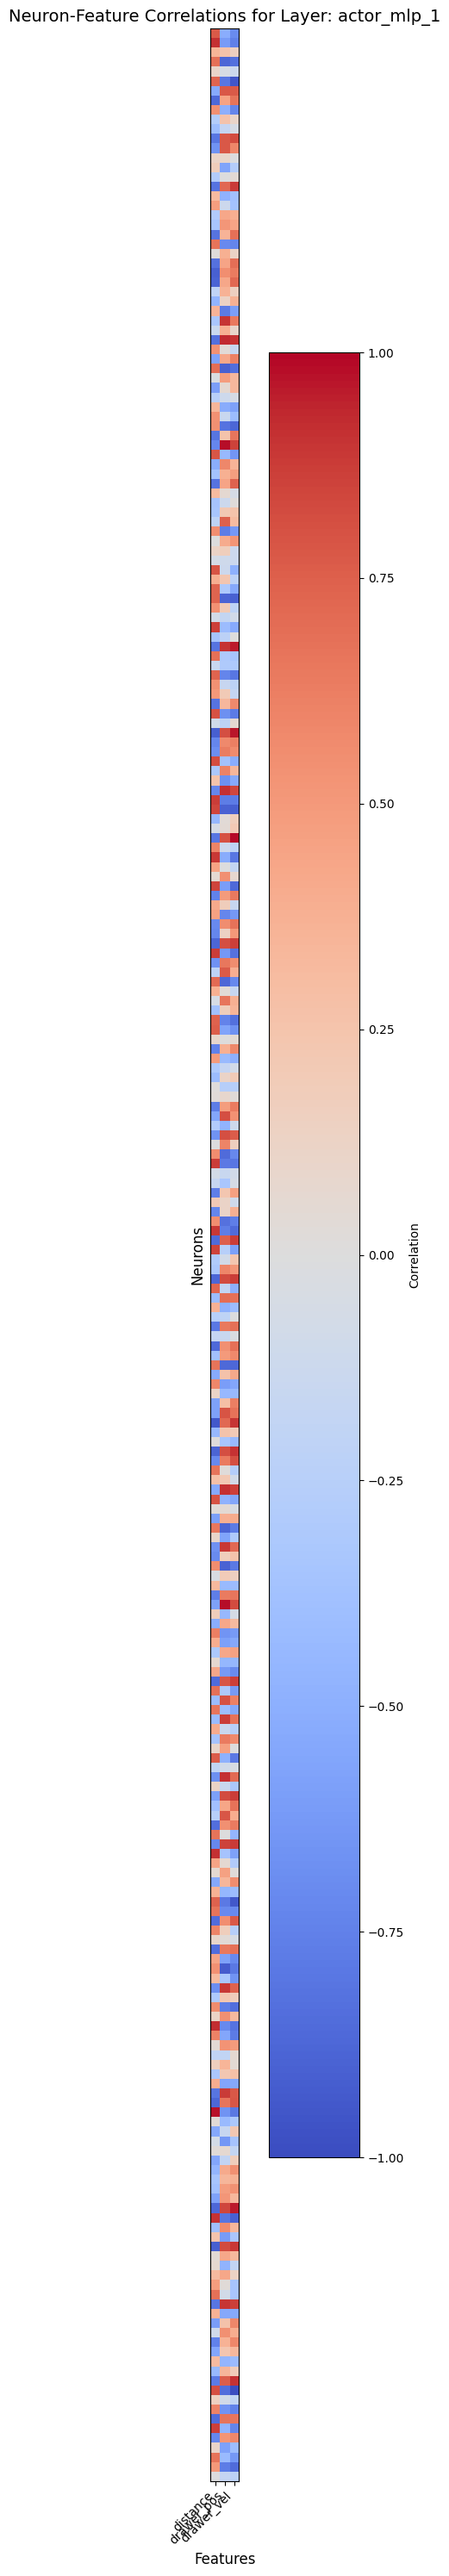

In [77]:
correlation_matrix = plot_feature_correlation_heatmap(
    correlation_analyzer,
    layer_name='actor_mlp_1',
    feature_keys=['distance', 'drawer_position', 'drawer_velocity'],
    sort_neurons=False
)

Computing correlations for features...


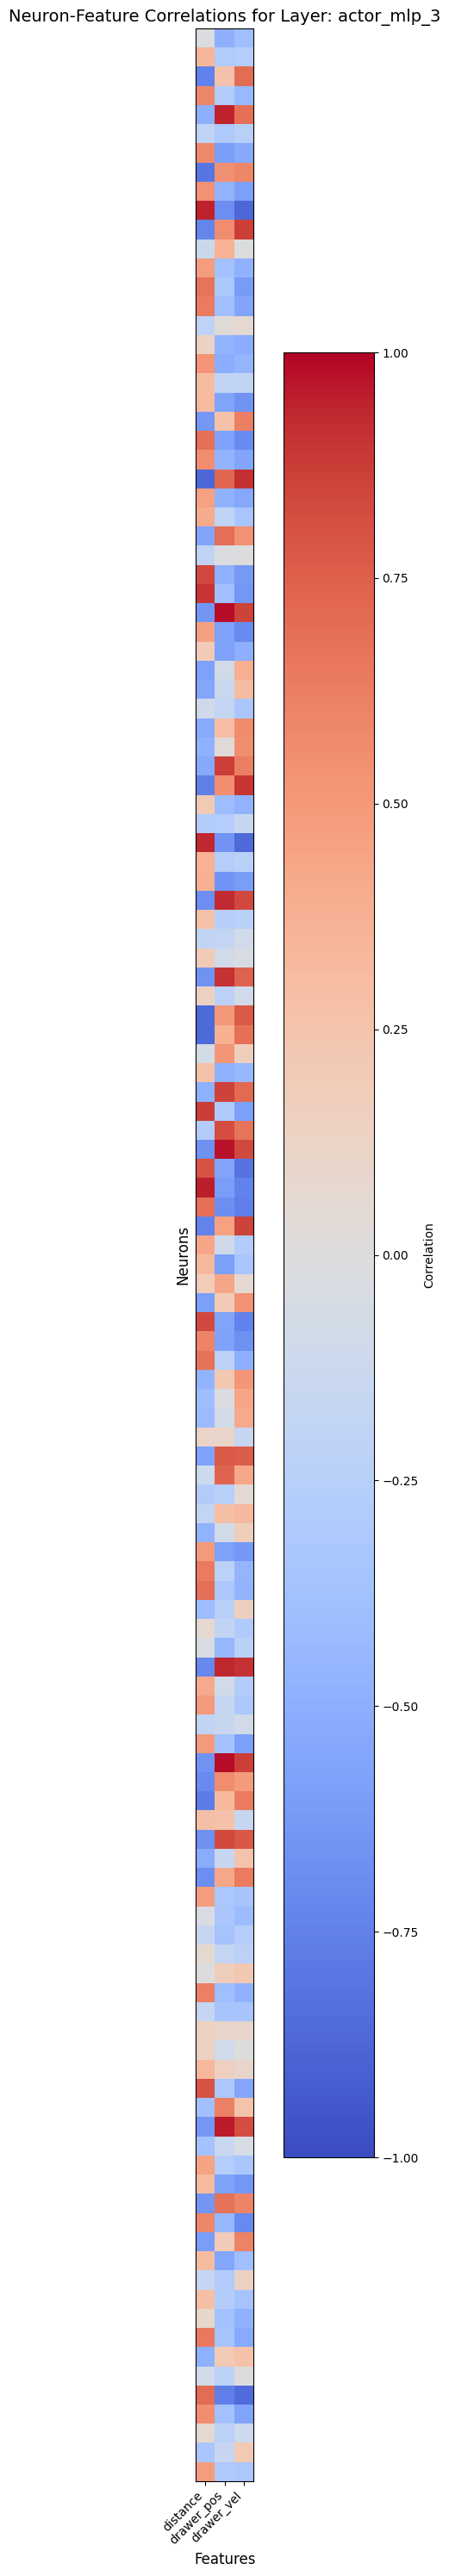

In [78]:
correlation_matrix = plot_feature_correlation_heatmap(
    correlation_analyzer,
    layer_name='actor_mlp_3',
    feature_keys=['distance', 'drawer_position', 'drawer_velocity'],
    sort_neurons=False
)

Computing correlations for features...


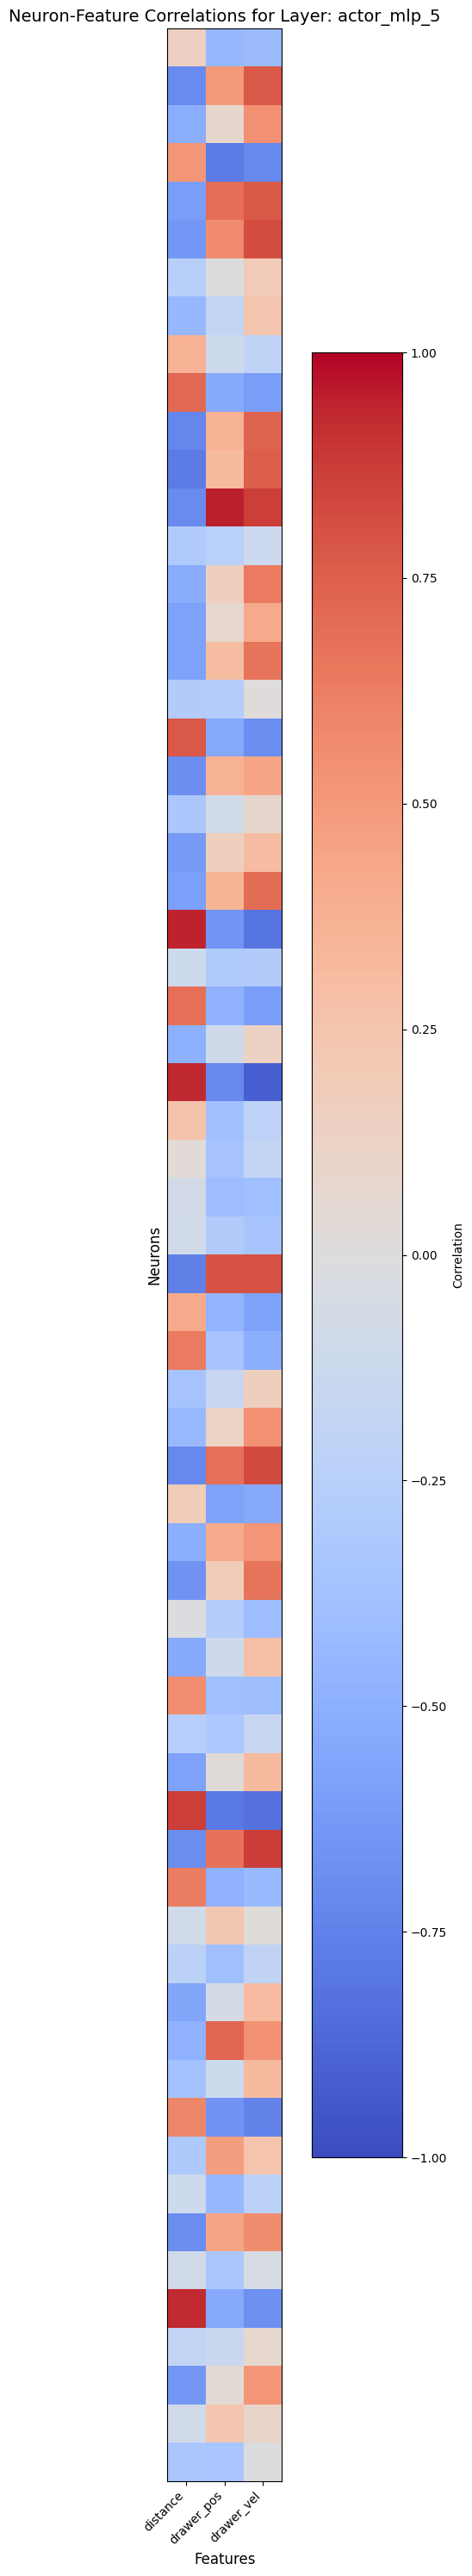

In [79]:
correlation_matrix = plot_feature_correlation_heatmap(
    correlation_analyzer,
    layer_name='actor_mlp_5',
    feature_keys=['distance', 'drawer_position', 'drawer_velocity'],
    sort_neurons=False
)

Computing correlations for features...


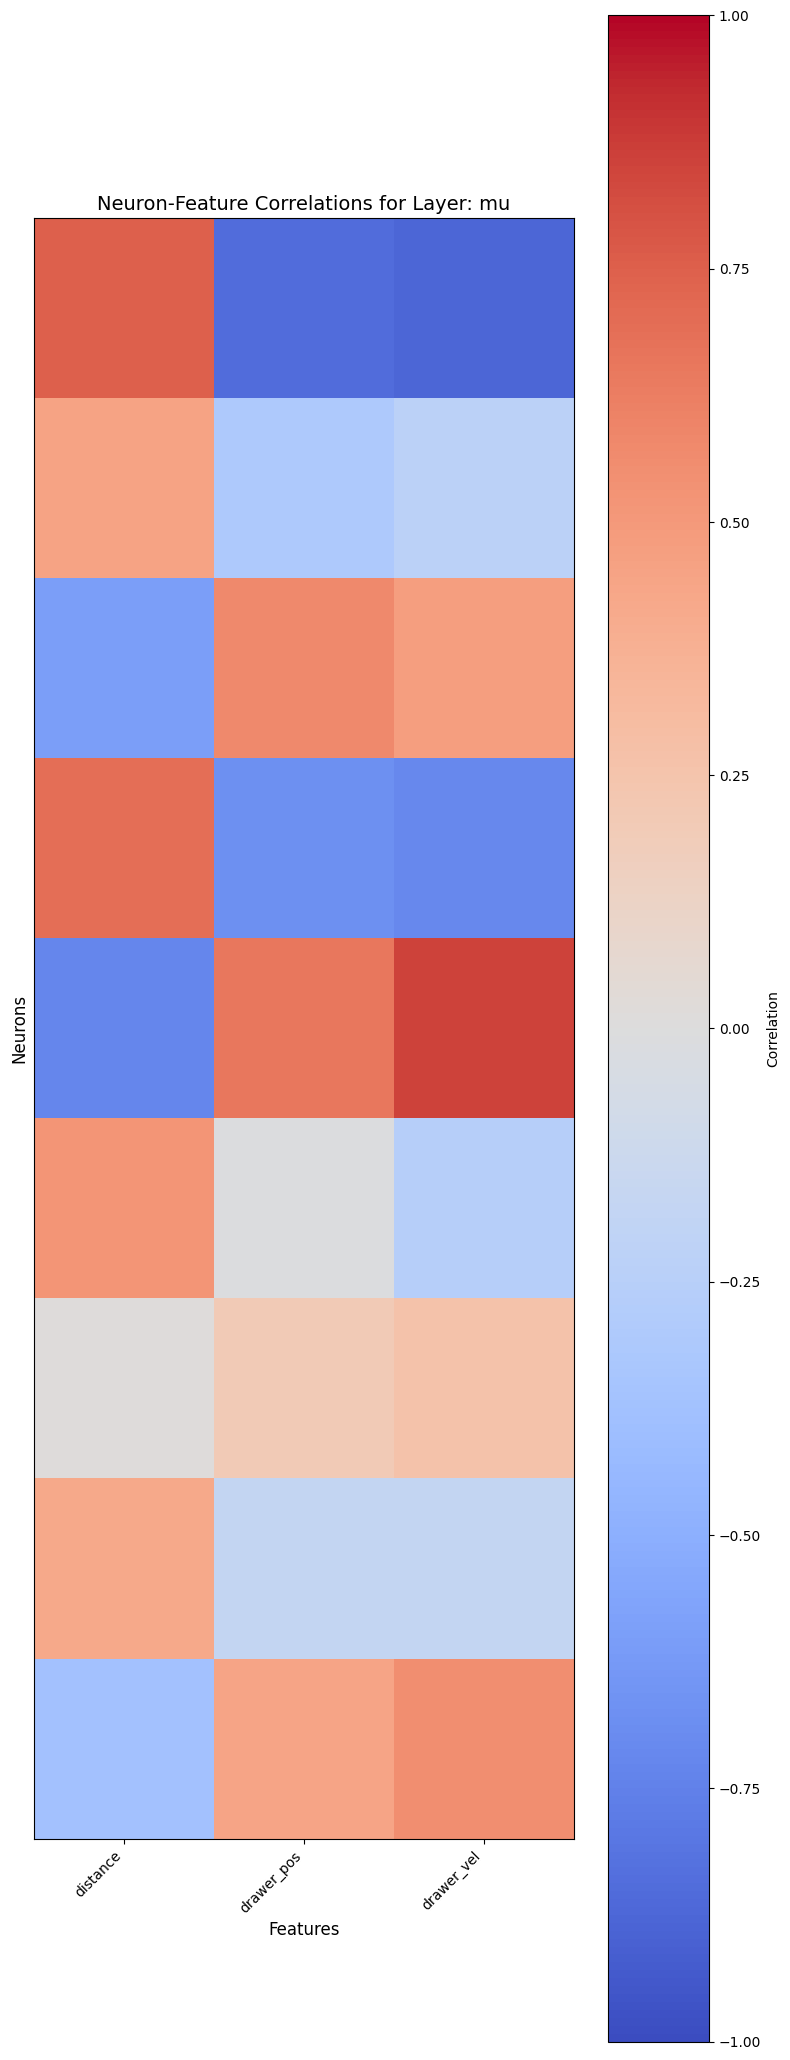

In [80]:
correlation_matrix = plot_feature_correlation_heatmap(
    correlation_analyzer,
    layer_name='mu',
    feature_keys=['distance', 'drawer_position', 'drawer_velocity'],
    sort_neurons=False
)

Computing correlations for features...


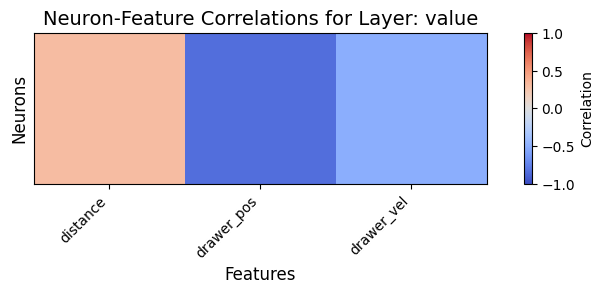

In [81]:
correlation_matrix = plot_feature_correlation_heatmap(
    correlation_analyzer,
    layer_name='value',
    feature_keys=['distance', 'drawer_position', 'drawer_velocity'],
    sort_neurons=False
)

### Correlation statistics

In [82]:
from src.correlation.correlation_print import pretty_print_correlated_neurons

In [85]:
pretty_print_correlated_neurons(
    correlation_analyzer,
    layer_name='actor_mlp_1',
    feature_keys=['distance', 'drawer_position', 'drawer_velocity'],
    threshold=0.7,
)


FEATURE-CORRELATED NEURONS SUMMARY (LAYER: actor_mlp_1, TOTAL NEURONS: 256)

DISTANCE: 80 neurons (31.2% of layer) with |correlation| >= 0.7
----------------------------------------------------------------------
  Neuron ID  Correlation  Bar
  ---------  -----------  ------------------------------
  217        0.969        █████████████████████████████
  145        -0.943       ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
  208        0.916        ███████████████████████████
  231        -0.912       ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
  190        0.908        ███████████████████████████
  73         -0.908       ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
  1          0.907        ███████████████████████████
  228        0.904        ███████████████████████████
  25         -0.899       ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
  86         0.886        ██████████████████████████
  ... and 70 more neurons

DRAWER POSITION: 67 neurons (26.2% of layer) with |correlation| >= 0.7
-------------------------------------------------------------

agrees with the phase analysis (sort of) that this layer is less specialized, but somehow 46.5% have correlations which is larger than the later 2 layers which is actually more specialized as seen from phase analysis

In [86]:
pretty_print_correlated_neurons(
    correlation_analyzer,
    layer_name='actor_mlp_3',
    feature_keys=['distance', 'drawer_position', 'drawer_velocity'],
    threshold=0.7,
)


FEATURE-CORRELATED NEURONS SUMMARY (LAYER: actor_mlp_3, TOTAL NEURONS: 128)

DISTANCE: 20 neurons (15.6% of layer) with |correlation| >= 0.7
----------------------------------------------------------------------
  Neuron ID  Correlation  Bar
  ---------  -----------  ------------------------------
  60         0.948        ████████████████████████████
  9          0.943        ████████████████████████████
  42         0.934        ████████████████████████████
  29         0.892        ██████████████████████████
  56         0.871        ██████████████████████████
  23         -0.870       ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
  51         -0.865       ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
  52         -0.863       ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
  28         0.835        █████████████████████████
  67         0.833        ████████████████████████
  ... and 10 more neurons

DRAWER POSITION: 16 neurons (12.5% of layer) with |correlation| >= 0.7
----------------------------------------------------------------------


this is a bit odd. suggests that emphasis on velocity followed by distance, but phase analysis below suggests that this layer focuses on approaching so i would expect distance to be more important

In [87]:
pretty_print_correlated_neurons(
    correlation_analyzer,
    layer_name='actor_mlp_5',
    feature_keys=['distance', 'drawer_position', 'drawer_velocity'],
    threshold=0.7,
)


FEATURE-CORRELATED NEURONS SUMMARY (LAYER: actor_mlp_5, TOTAL NEURONS: 64)

DISTANCE: 11 neurons (17.2% of layer) with |correlation| >= 0.7
----------------------------------------------------------------------
  Neuron ID  Correlation  Bar
  ---------  -----------  ------------------------------
  23         0.941        ████████████████████████████
  27         0.937        ████████████████████████████
  59         0.925        ███████████████████████████
  46         0.867        ██████████████████████████
  11         -0.776       ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
  18         0.775        ███████████████████████
  32         -0.757       ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
  10         -0.722       ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
  9          0.718        █████████████████████
  37         -0.717       ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
  ... and 1 more neurons

DRAWER POSITION: 6 neurons (9.4% of layer) with |correlation| >= 0.7
----------------------------------------------------------------------
  Neuron ID  Correlation 

has strong emphasis on velocity, which agrees with the opening phase specialization seen later below

## Detecting phase neurons
we compare the average activation of neurons and highlight those which are more active in one phase compared to others.

In [47]:
from src.correlation.correlation_print import pretty_print_phase_neurons

In [63]:
pretty_print_phase_neurons(correlation_analyzer.identify_all_phase_neurons('actor_mlp_1'))


PHASE-SELECTIVE NEURONS SUMMARY

APPROACHING PHASE: 29 neurons
----------------------------------------
  Neuron ID  Selectivity  Bar
  ---------  -----------  ------------------------------
  96         15.890       ██████████████████████████████
  246        6.299        ██████████████████████████████
  195        5.327        ██████████████████████████████
  5          5.239        ██████████████████████████████
  41         3.451        ████████████████████
  125        3.279        ███████████████████
  71         3.220        ███████████████████
  208        3.053        ██████████████████
  209        3.039        ██████████████████
  59         2.970        █████████████████
  ... and 19 more neurons

OPENING PHASE: 12 neurons
----------------------------------------
  Neuron ID  Selectivity  Bar
  ---------  -----------  ------------------------------
  231        2.441        ██████████████
  64         2.369        ██████████████
  84         2.333        █████████████
  73

Early layer is less specialized, with some focus on approaching

In [60]:
pretty_print_phase_neurons(correlation_analyzer.identify_all_phase_neurons('actor_mlp_3'))


PHASE-SELECTIVE NEURONS SUMMARY

APPROACHING PHASE: 51 neurons
----------------------------------------
  Neuron ID  Selectivity  Bar
  ---------  -----------  ------------------------------
  102        32.078       ██████████████████████████████
  42         22.762       ██████████████████████████████
  12         20.801       ██████████████████████████████
  118        19.184       ██████████████████████████████
  28         17.055       ██████████████████████████████
  60         15.013       ██████████████████████████████
  9          14.891       ██████████████████████████████
  111        12.289       ██████████████████████████████
  21         9.169        ██████████████████████████████
  63         7.400        ██████████████████████████████
  ... and 41 more neurons

OPENING PHASE: 39 neurons
----------------------------------------
  Neuron ID  Selectivity  Bar
  ---------  -----------  ------------------------------
  71         8.189        ██████████████████████████████


middle layer is more specialized, with a focus on approaching and nearly equal on opening

In [61]:
pretty_print_phase_neurons(correlation_analyzer.identify_all_phase_neurons('actor_mlp_5'))


PHASE-SELECTIVE NEURONS SUMMARY

APPROACHING PHASE: 18 neurons
----------------------------------------
  Neuron ID  Selectivity  Bar
  ---------  -----------  ------------------------------
  18         83.323       ██████████████████████████████
  59         30.196       ██████████████████████████████
  27         27.353       ██████████████████████████████
  23         22.689       ██████████████████████████████
  25         16.038       ██████████████████████████████
  33         14.773       ██████████████████████████████
  31         6.042        ██████████████████████████████
  54         5.722        ██████████████████████████████
  46         4.555        ███████████████████████████
  9          4.288        █████████████████████████
  ... and 8 more neurons

OPENING PHASE: 33 neurons
----------------------------------------
  Neuron ID  Selectivity  Bar
  ---------  -----------  ------------------------------
  60         15.178       ██████████████████████████████
  53     

later layer is more specialized, with strong focus on opening and some on deceleration and approaching